<a href="https://colab.research.google.com/github/ecbaile/pnt_exercises/blob/main/pnt_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lecture 1: Introduction to Number Theory and Probabilistic Number Theory**

# Ex 0: Draw a large number of data points from a distribution and plot the resulting histogram

In [1]:
# Pull in some useful packages
import numpy as np
import matplotlib.pyplot as plt

In [27]:
def create_data(data_size):
  '''
  This function takes in
    'n', an integer giving the size of the sample set requested, and
    'dist', an option string indicating which of one of the popular standard (1-d)distributions we want to draw from.  Options are:
        'b': Bernoulli(1/2)
        'e': Exponential(1)
        'g': Geometric(1/2)
        'n': Standard Normal (default)
        'p': Poisson(1)
        'u': Uniform([0,1]) (continuous)
  and returns a list of n draws from the requested distribution.
  '''
  print('Please enter one of the following distributions.  Type')
  print('"b" for Bernoulli(1/2)')
  print('"e" for Exponential(1)')
  print('"g" for Geometric(1/2)')
  print('"n" for Normal(0,1)')
  print('"p" for Poisson(1)')
  print('"u" for Uniform([0,1])')

  dist = input("Enter a choice: ")

  distributions = {
        'b': lambda sz: np.random.binomial(1, 0.5, sz),
        'e': lambda sz: np.random.standard_exponential(sz),
        'g': lambda sz: np.random.geometric(0.5, sz),
        'n': lambda sz: np.random.standard_normal(sz),
        'p': lambda sz: np.random.poisson(1, sz),
        'u': lambda sz: np.random.uniform(0, 1, sz)
    }
  if dist in distributions:
    data = distributions[dist](data_size)
  else:
    raise ValueError("Distribution input must be one of b, e, g, n, p, u.")

  return data

You can run the above function as `create_data(1000)' for example to create a data set of size 100, where the function will ask you to choose from one of the popular distributions:

In [35]:
data = create_data(1000)

Please enter one of the following distributions.  Type
"b" for Bernoulli(1/2)
"e" for Exponential(1)
"g" for Geometric(1/2)
"n" for Normal(0,1)
"p" for Poisson(1)
"u" for Uniform([0,1])
Enter a choice: g


We can plot the data:

In [2]:
def plot_histogram(data, bins=10):
    plt.hist(data, bins=bins, edgecolor='black')
    plt.title('Histogram of Data')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

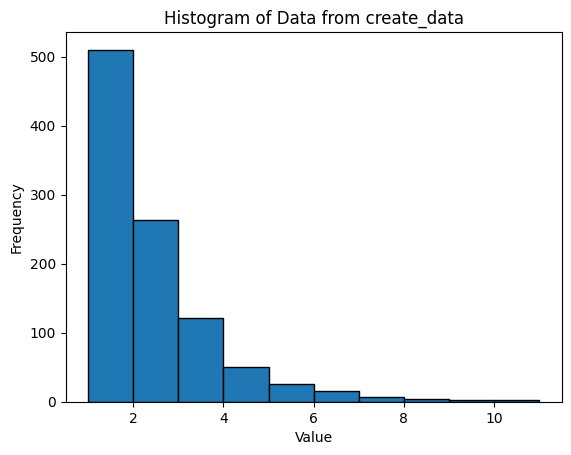

In [37]:
plot_histogram(data)
# The above uses the previously defined variable 'data', and the default number of bins, 10.

# Ex 1: Draw a large number of values of $\zeta(1/2 + i \tau)$, where $\tau$ is a uniform random variable on $[T, 2T]$ for some large(ish) value of $T$:\

In [57]:
import mpmath # Has pre-built functionality for zeta

T = 10**8

def get_rnd_zeta_values(sz, T):
  '''
  Returns a list of length sz of values of \zeta(1/2 + i tau) for
  tau ~ Unif([T, 2T])
  '''
  rnd_heights = np.random.uniform(T, 2*T, sz)
  zeta_vals = []
  for t in rnd_heights:
    # We have to create complex multiprecision numbers in order to evaluate zeta at them.  We want 1/2 + i t for t an element of rnd_heights
    s = mpmath.mpc(0.5, t)
    zeta_vals.append(mpmath.zeta(s))
  return zeta_vals

'''
Now, for reasons that we will see, we want to plot Re(log(zeta(1/2 + i t))), for each of the random zeta values.
'''
def get_re_log_zeta(zeta_data):
  '''
  Given zeta_data, a list of multiprecision values of zeta, returns the real part of the (complex) logarithm of each value.
  Notice this is the same as the log of the absolute value.
  '''
  return [float(mpmath.log(abs(z))) for z in zeta_data]

Let's plot! (Creating the zeta_data this way is a little slow, so have patience using larger sample sizes.)

In [68]:
zeta_data = get_rnd_zeta_values(5000,T)

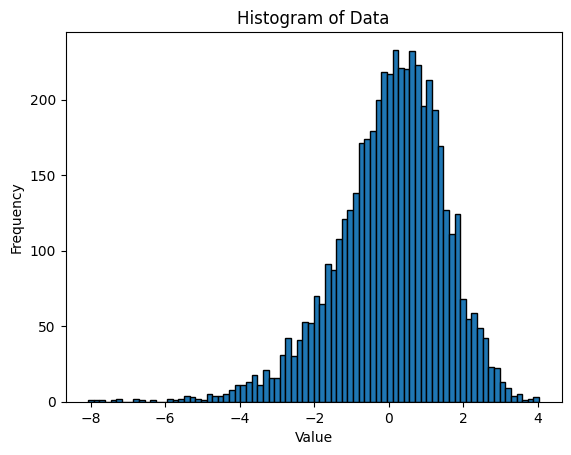

In [71]:
log_zeta_data = get_re_log_zeta(zeta_data)

plot_histogram(log_zeta_data, bins=80)

# Ex 2: Plot the prime omega functions $\omega(n)$ and $\Omega(n)$.

In [3]:
# Luckily we have pre-built functionality for both of these additive functions (n.b. if you have sympy 1.13 or beyond then you need to pull in the updated version of these functions.  See the associated sympy documentation for the right incantation.)
from sympy.ntheory.factor_ import primenu, primeomega

In [14]:
# primenu is little-omega:
primenu(12)

2

In [16]:
# primeomega is big-omega:
primeomega(12)

3

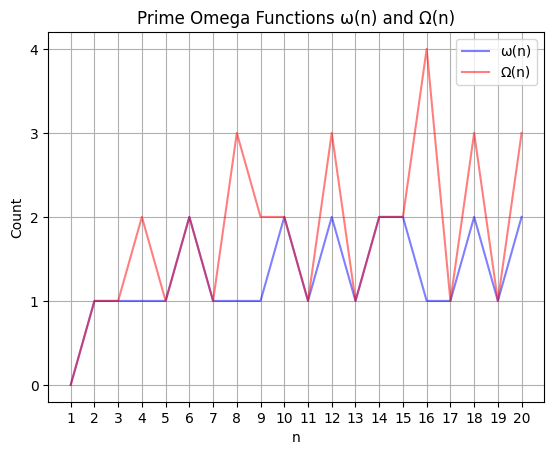

In [4]:
# Plotting!
ints = np.arange(1, 21)
littleomega = [primenu(n) for n in ints]
bigomega = [primeomega(n) for n in ints]

# Plotting
plt.plot(ints, littleomega, label='ω(n)', color='blue', alpha=0.5)
plt.plot(ints, bigomega, label='Ω(n)', color='red', alpha=0.5)
plt.title('Prime Omega Functions ω(n) and Ω(n)')
plt.xlabel('n')
plt.xticks(np.arange(1,21, dtype=int))
plt.yticks(np.arange(0,5, dtype=int))
plt.ylabel('Count')
plt.grid(True)
plt.legend()
plt.show()

# Ex 3: Run an experiment to see the average number of prime factors (i.e. $\mathbb{E}_N[\omega]$)

In [5]:
def omega_experiment(N, num_trials=1000):
  '''
  This function samples num_trials number of times (default 1000) a random integer from 1 to N inclusive, and returns the evaluation of little-omega(n) in a vector
  '''
  return [primenu(np.random.randint(1,N+1)) for _ in range(num_trials)]

In [7]:
N = 10**8
num_pf_exp = omega_experiment(N)

In [8]:
# Let's get the frequencies and store them in a Counter dict
from collections import Counter

freqs = Counter(num_pf_exp)

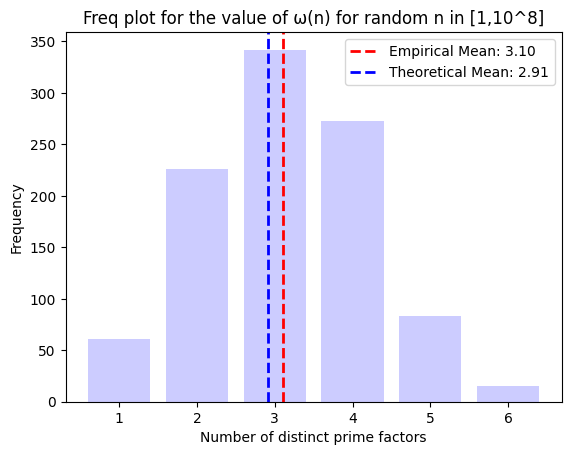

In [36]:
# Let's plot
plt.bar(freqs.keys(), freqs.values(), color='blue', alpha=0.2)

# Calculate and add the mean to the plot
plt.axvline(np.mean(num_pf_exp), color='red', linestyle='dashed', linewidth=2, label=f'Empirical Mean: {np.mean(num_pf_exp):.2f}')

# Also add the theoretical mean loglogN
plt.axvline(np.log(np.log(N)), color='blue', linestyle='dashed', linewidth=2, label=f'Theoretical Mean: {np.log(np.log(N)):.2f}')

plt.xlabel('Number of distinct prime factors')
plt.ylabel('Frequency')
plt.title('Freq plot for the value of ω(n) for random n in [1,10^8]')
plt.legend();


(Though do take care -- these types of plots do suffer from an issue common to many of these types of questions: log(log(N)) doesn't change very quickly! To see an average of 10 prime factors should expect to need N around exp(e^10)... very large!)

# Ex 4: Run an experiment to 'see' Erdős-Kac CLT

In [28]:
# Trying to see the CLT from E-K (N chosen to be functionally large-ish)
N = 20**(12)
num_pf_exp = omega_experiment(N)

normalized = (num_pf_exp - np.log(np.log(N)))/np.sqrt(np.log(np.log(N)))

In [29]:
from collections import Counter

norm_freqs = Counter(normalized)
norm_freqs

Counter({0.749166684034903: 190,
         -0.835918781583076: 148,
         -0.307556959710416: 253,
         1.27752850590756: 83,
         0.220804862162244: 264,
         1.80589032778022: 24,
         -1.36428060345574: 35,
         2.33425214965288: 3})

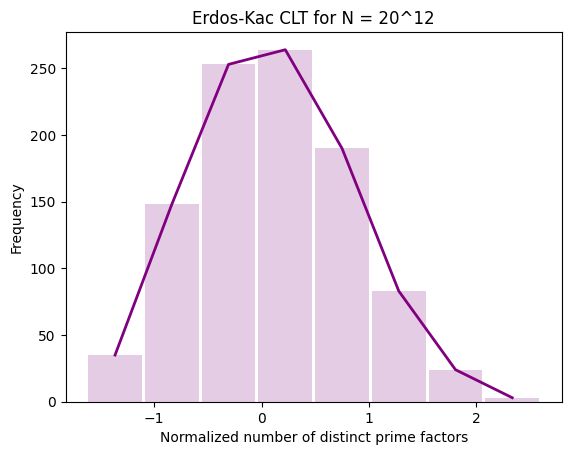

In [32]:
# Let's plot
plt.bar(norm_freqs.keys(), norm_freqs.values(), width = 0.5, color='purple', alpha=0.2)

# (Adding a line connecting the bar heights)
ks = sorted(norm_freqs.keys())
vs = [norm_freqs[k] for k in ks]

plt.plot(ks, vs, color='purple', linestyle='-', linewidth=2)

plt.xlabel('Normalized number of distinct prime factors')
plt.ylabel('Frequency');
plt.title('Erdos-Kac CLT for N = 20^12');

# Ex 5: For a randomly drawn $t$, the function $p^{-it}$ behaves like a random variable uniform on the unit circle

In [79]:
# This is not hugely deep, it is just a comment that p^it = exp(it log p) really.  The more pertinent part of the principle is that for different p, p^(it) and q^(it) behave independently-ish.

def steinhaus_p(p, T):
  '''
  Returns p^(-i t)
  '''
  return p**(-1j*T)

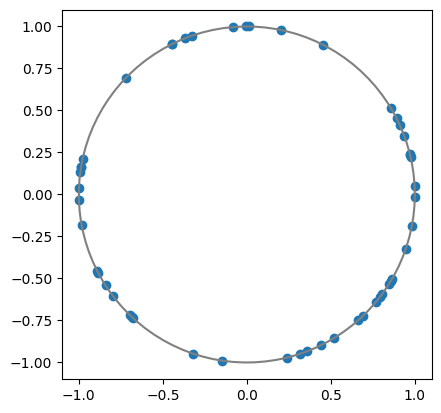

In [80]:
# Let's pick a prime and plot lots of calls to steinhaus_p
p = 13
st_vals = [steinhaus_p(p, np.random.uniform(1000,2000)) for _ in range(50)]
st_vals_re = [s.real for s in st_vals]
st_vals_im = [s.imag for s in st_vals]

plt.scatter(st_vals_re, st_vals_im)

# Add the circle
theta = np.linspace(0, 2*np.pi, 100)
plt.plot(np.cos(theta), np.sin(theta), color = 'gray')
plt.gca().set_aspect('equal', adjustable='box'); # Setting the aspect ratio to the equal since Python likes to show ellipses

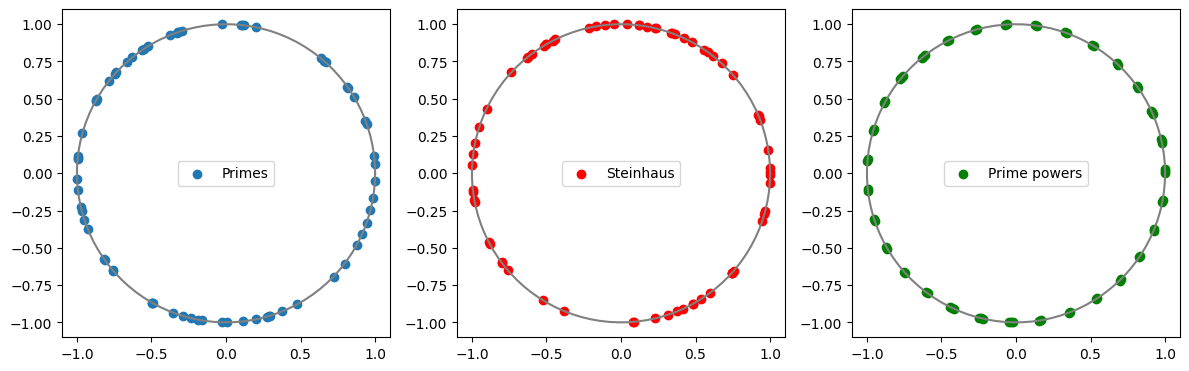

In [87]:
# Now let's 'test' the independence

# Pulling a list of primes
from sympy import *

primelist = sieve.primerange(101,500)
num_primes = len(list(sieve.primerange(101,500)))

# Same T for each p
T = np.random.uniform(1000,2000)
steinhaus_ps = [ steinhaus_p(p, T) for p in primelist]
real_parts = [s.real for s in steinhaus_ps]
imag_parts = [s.imag for s in steinhaus_ps]

# Plotting these alongside Steinhaus r.v.s
plt.figure(figsize=(12, 6))

# (p^(-it))_p
plt.subplot(1, 3, 1)
plt.scatter(real_parts, imag_parts, label = 'Primes')

# Add the circle
theta = np.linspace(0, 2*np.pi, 100)
plt.plot(np.cos(theta), np.sin(theta), color = 'gray')
plt.gca().set_aspect('equal', adjustable='box');
plt.legend()

# Steinhaus
circle_vals = [np.e**(1j * np.random.uniform(0,2*np.pi)) for _ in range(num_primes)]
circle_real_parts = [c.real for c in circle_vals]
circle_imag_parts = [c.imag for c in circle_vals]

plt.subplot(1, 3, 2)
plt.scatter(circle_real_parts, circle_imag_parts, color='red', label = 'Steinhaus')
plt.plot(np.cos(theta), np.sin(theta), color = 'gray')
plt.gca().set_aspect('equal', adjustable='box');
plt.legend()

# Powers of 2
powers = [2**(n*1j * T) for n in range(num_primes)]
powers_re = [po.real for po in powers]
powers_im = [po.imag for po in powers]

plt.subplot(1, 3, 3)
plt.scatter(powers_re, powers_im, color='green', label = 'Prime powers')
plt.plot(np.cos(theta), np.sin(theta), color = 'gray')
plt.gca().set_aspect('equal', adjustable='box');
plt.legend()


plt.tight_layout()
